#Paquetes necesarios

Podremos hacer uso del mismo *environment* de la primera práctica, aunque en ocasiones pedirá instalar Pillow

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

Carga imagen desde archivo y convierte a RGB

(512, 512, 3)


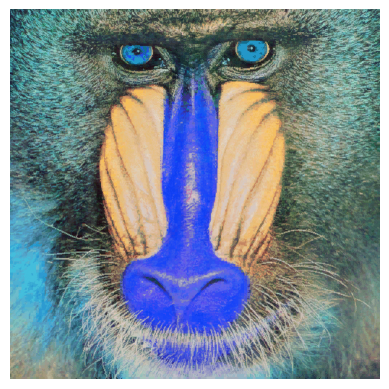

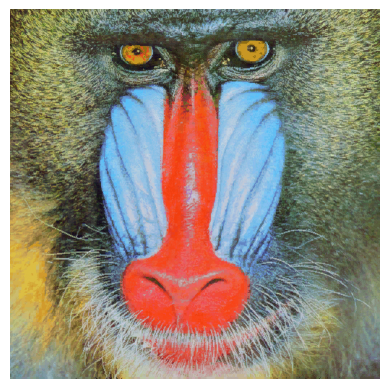

In [3]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg') 

#Si hay lectura correcta
if img is not None:
    #Muestra dimensiones
    print(img.shape)
    #Muestra la imagen original con matplotlib
    plt.figure()
    #Elimina etiquetas de los ejes que muestra matplotlib
    plt.axis("off")
    plt.imshow(img) 
    plt.show()

    #Recordar que OpenCV lee las imágenes almacenando en formato BGR, por lo que convertimos para visualizr de forma correcta a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #Muestra la imagen tras convertir a RGB
    #Eliminamos etiquetas de los ejes
    plt.figure()
    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.show()
else: 
    print('Imagen no encontrada')

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

La fila con más píxeles blancos es: 12
Y el valor máximo es de: 0.43
Filas con ≥ 90% de 0.43:
Fila 6: 203 píxeles, 0.40 %
Fila 12: 220 píxeles, 0.43 %
Fila 15: 204 píxeles, 0.40 %
Fila 20: 200 píxeles, 0.39 %
Fila 21: 201 píxeles, 0.39 %
Fila 88: 199 píxeles, 0.39 %
Fila 100: 212 píxeles, 0.41 %


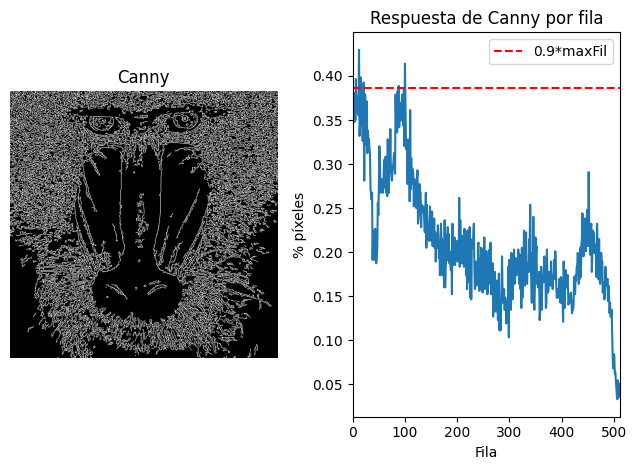

In [4]:
#Obtiene contornos con el operador de Canny
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Obtiene contornos con el operador de Canny
#Parámetros: imagen de entrada, umbral inferior, umbral superior
canny = cv2.Canny(gris, 100, 200)

# Contamos los píxeles blancos por fila
# En la documentación nos dice que debemos cambiar el 0 por el 1
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts[:, 0] / (255 * canny.shape[1])  # Calculamos el porcentaje de píxeles blancos por fila

# Fila con máximo de píxeles blancos
maxFil = rows.argmax()
maxVal = rows.max()  # valor máximo
print("La fila con más píxeles blancos es:", maxFil)
print(f"Y el valor máximo es de: {maxVal:.2f}")

# Umbral al 90% del máximo
limit = 0.9 * maxVal
print(f"Filas con ≥ 90% de {maxVal:.2f}:")
# Debemos dividir entre 255 porque tenemos que sacar los pixeles blancos, que valen 255
[print(f"Fila {i}: {row_counts[i,0]//255} píxeles, {rows[i]:.2f} %") 
 for i in np.where(rows >= limit)[0]]


#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1,2,2)
plt.plot(rows)
plt.title("Respuesta de Canny por fila")
plt.xlabel("Fila")
plt.ylabel("% píxeles")
plt.axhline(limit, color='red', linestyle='--', label='0.9*maxFil')
plt.xlim([0, canny.shape[0]])
plt.legend()

plt.tight_layout()
plt.show()

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Filas ≥90% del máximo (485.0 píxeles): [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101]
Columnas ≥90% del máximo (453.0 píxeles): [ 60  63  67  68  72  75  76  77  79  80  82  83  84  85  87  88  89  90
  91  92  93  94  95  96  97  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 123 124 125 126 127 128 131
 132 135 376 377 378 379 380 381 382 383 386 387 388 391 392 395 396 397
 399 400 403 404 406 407 410 411 416 418 423 424]


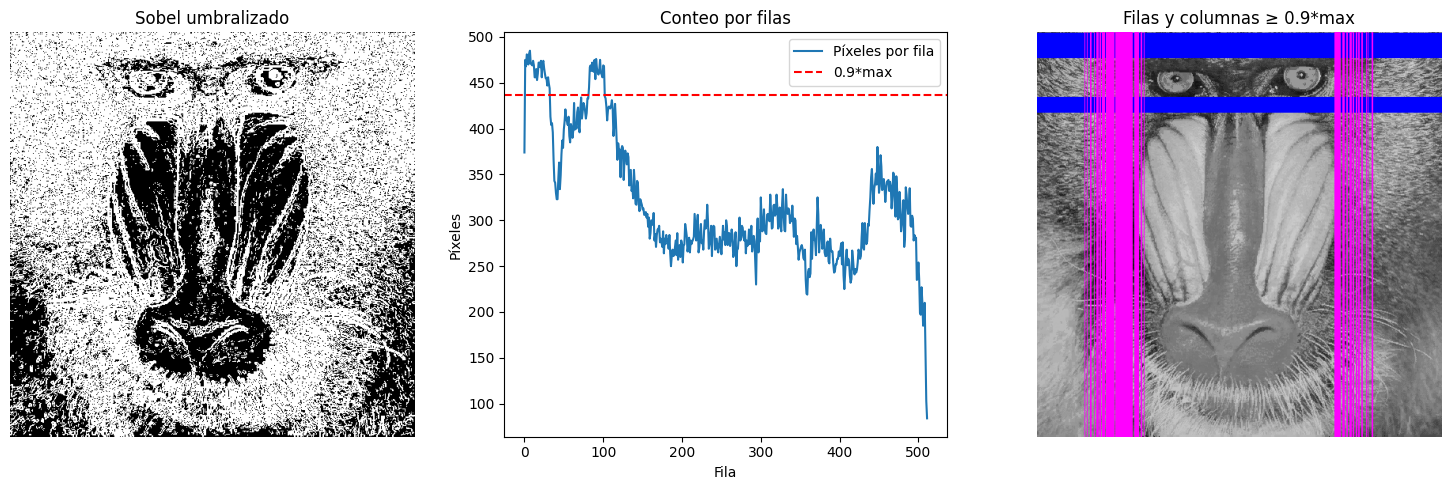

In [5]:
# 1. Cargar imagen en escala de grises
img = cv2.imread("mandril.jpg", cv2.IMREAD_GRAYSCALE)

# 2. Aplicar Sobel en X y Y
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobelx**2 + sobely**2)

# 3. Convertir a 8 bits
sobel_8u = cv2.convertScaleAbs(sobel)

# 4. Umbralizado para obtener imagen binaria
_, sobel_thresh = cv2.threshold(sobel_8u, 50, 255, cv2.THRESH_BINARY)

# 5. Conteo de píxeles no nulos por fila y columna
row_counts = cv2.reduce(sobel_thresh, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1) / 255
col_counts = cv2.reduce(sobel_thresh, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1) / 255

# 6. Determinar máximos
max_row = row_counts.max()
max_col = col_counts.max()

# 7. Filas y columnas con al menos 90% del máximo
threshold_row = 0.9 * max_row
threshold_col = 0.9 * max_col

rows_selected = np.where(row_counts[:,0] >= threshold_row)[0]
cols_selected = np.where(col_counts[0,:] >= threshold_col)[0]

print(f"Filas ≥90% del máximo ({max_row} píxeles): {rows_selected}")
print(f"Columnas ≥90% del máximo ({max_col} píxeles): {cols_selected}")

# 8. Dibujar sobre la imagen original
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Dibujar líneas horizontales para filas seleccionadas
for r in rows_selected:
    cv2.line(img_rgb, (0, r), (img_rgb.shape[1]-1, r), (0,0,255), 1)

# Dibujar líneas verticales para columnas seleccionadas
for c in cols_selected:
    cv2.line(img_rgb, (c, 0), (c, img_rgb.shape[0]-1), (255,0,255), 1)

# 9. Mostrar resultados
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(sobel_thresh, cmap='gray')
plt.title("Sobel umbralizado")
plt.axis("off")

plt.subplot(1,3,2)
plt.plot(row_counts[:,0], label="Píxeles por fila")
plt.axhline(threshold_row, color='red', linestyle='--', label='0.9*max')
plt.title("Conteo por filas")
plt.xlabel("Fila")
plt.ylabel("Píxeles")
plt.legend()

plt.subplot(1,3,3)
plt.imshow(img_rgb)
plt.title("Filas y columnas ≥ 0.9*max")
plt.axis("off")

plt.tight_layout()
plt.show()


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [11]:
vid = cv2.VideoCapture(0)
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

modo = 0  

while True:
    ret, frame = vid.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)

    if   modo == 0: salida = frame.copy()
    elif modo == 1:
        objetos = eliminadorFondo.apply(frame)
        salida = cv2.cvtColor(objetos, cv2.COLOR_GRAY2BGR)
    elif modo == 2:
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        bordes = cv2.Canny(gris, 100, 200)
        salida = cv2.cvtColor(bordes, cv2.COLOR_GRAY2BGR)
    elif modo == 3: salida = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    elif modo == 4: salida = cv2.GaussianBlur(frame, (15,15), 0)
    elif modo == 5: salida = cv2.medianBlur(frame, 15)
    elif modo == 6: salida = cv2.Laplacian(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), cv2.CV_64F)
    elif modo == 7: salida = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    elif modo == 8: salida = cv2.cvtColor(frame, cv2.COLOR_BGR2LAB)
    elif modo == 9: salida = cv2.applyColorMap(frame, cv2.COLORMAP_JET)
    else: salida = frame.copy()

    if isinstance(salida, type(frame)) and len(salida.shape) == 2:
        cv2.imshow("Demostrador", salida)
    else:
        cv2.imshow("Demostrador", salida)

    key = cv2.waitKey(20) & 0xFF
    if key == 27:  
        break
    elif key in [ord(str(i)) for i in range(10)]:
        modo = int(chr(key))

vid.release()
cv2.destroyAllWindows()


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

detectando = True
aplicando_blur = True
pausado = False

print("Controles:")
print("- ESPACIO: pausar/reanudar detección")
print("- ESC: Salir")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error al capturar frame. Saliendo...")
        break
    
    if pausado:
        display_frame = frame.copy()
    else:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        if detectando:
            faces = face_cascade.detectMultiScale(frame_rgb, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
            
            display_frame = frame.copy()
            
            if aplicando_blur and len(faces) > 0:
                for (x, y, w, h) in faces:
                    roi = frame[y:y+h, x:x+w]
                    
                    blurred_roi = cv2.GaussianBlur(roi, (99, 99), 0)
                    
                    display_frame[y:y+h, x:x+w] = blurred_roi
                    
                    cv2.rectangle(display_frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
                    cv2.putText(display_frame, "Privacidad activada", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
            
            cv2.putText(display_frame, f"Rostros detectados: {len(faces)}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        else:
            display_frame = frame.copy()
    
    cv2.imshow('Ultima cena', display_frame)
    
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break
    elif key == ord(' '):
        pausado = not pausado
    
    cv2.waitKey(1)

cap.release()
cv2.destroyAllWindows()

Controles:
- ESPACIO: pausar/reanudar detección
- ESC: Salir
